In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler

In [3]:
file = 'C:\\stocks_&_factors.csv'
df = pd.read_csv(file)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mmm       3122 non-null   float64
 1   axp       3122 non-null   float64
 2   aapl      3122 non-null   float64
 3   ba        3122 non-null   float64
 4   amgn      3122 non-null   float64
 5   cat       3122 non-null   float64
 6   cvx       3122 non-null   float64
 7   csco      3122 non-null   float64
 8   ko        3122 non-null   float64
 9   pfe       3122 non-null   float64
 10  gs        3122 non-null   float64
 11  hd        3122 non-null   float64
 12  hon       3122 non-null   float64
 13  ibm       3122 non-null   float64
 14  intc      3122 non-null   float64
 15  jnj       3122 non-null   float64
 16  jpm       3122 non-null   float64
 17  mcd       3122 non-null   float64
 18  mrk       3122 non-null   float64
 19  msft      3122 non-null   float64
 20  nke       3122 non-null   floa

In [5]:
df

,mmm,axp,aapl,ba,amgn,cat,cvx,csco,ko,pfe,...,visa,wba,wmt,dis,rtx,xom,factor01,factor02,factor03,date
0,1.059262,-1.038072,0.274833,-0.637321,-0.340587,0.452968,0.406719,0.801072,2.449438,-0.668937,...,-2.372938,-0.204290,-0.144613,0.513041,0.614806,0.925471,1.994018,1.573134,0.232349,2009-07-01
1,-0.809989,-3.225373,-1.979871,-3.371376,-2.475421,-4.467091,-3.207851,-1.608614,-0.611872,-2.859010,...,-1.191278,-2.205465,-1.206337,-2.635711,-3.982798,-2.977566,-10.959370,0.118236,1.471476,2009-07-02
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.290846,-0.253915,0.030770,2009-07-03
3,0.694677,5.461064,-1.025032,-0.663475,1.120568,-0.126103,-0.435595,0.162031,0.245198,0.619512,...,0.977233,2.783207,-0.125628,1.088624,1.307559,-0.571054,2.504505,0.679455,-2.109683,2009-07-06
4,-3.198799,-3.857466,-2.329964,-3.819560,0.345225,-4.549906,-2.270675,-1.577406,-0.737406,0.137471,...,-1.594983,-2.227264,0.230198,-2.455187,-2.930402,-2.287342,-7.623477,1.916702,-0.906133,2009-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,0.466782,1.310494,-0.217139,2.833395,0.934002,2.562881,0.815337,0.037900,0.497651,0.357874,...,0.662535,0.038395,0.696305,1.472030,0.288268,0.403790,2.857260,-0.835063,-0.304521,2021-06-24
3118,0.768025,0.734470,-0.225124,-0.877849,0.715426,-1.391047,0.149226,0.529102,-0.128783,-0.537292,...,0.456120,0.115097,1.176313,0.235770,-0.149795,0.216752,1.062054,0.693455,-0.961221,2021-06-25
3119,0.894575,-2.794665,1.246797,-3.448759,0.065909,-0.018494,-3.133391,-0.188644,-0.110518,0.358515,...,-1.370378,0.095813,-0.310885,-1.003051,-1.874000,-2.584933,-2.202163,1.892326,1.920570,2021-06-28
3120,-0.239472,-0.322159,1.143460,-1.765790,-0.156604,-0.542459,-0.221420,-0.094455,-0.739922,-0.051138,...,0.791426,-0.422266,-0.580975,-1.506448,-0.790331,-0.620873,-0.708645,0.334164,1.258575,2021-06-29


In [6]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d').dt.to_period('D')

In [7]:
# Setting Date Index
df.set_index('date', inplace=True)
df.index = df.index.to_timestamp()

# Functions

In [8]:
def adf_statistics(time_series):
    """
    Function to executre augmented Dickey-Fuller test for stationarity
    """
    result = adfuller(time_series.values)
    if result[1] < 0.0500:             # result[1] contains the p-value
        return 0                       # returns 0 value if p-value of test is under 5%
    else:
        return 1
    

In [9]:
def adf_tests(df):
    """
    Function to execute ADF test on every column in a DataFrame
    """
    results = df.apply(adf_statistics, axis=0) # Output is a Pandas series
    if sum(results)==0:
        print('Null hypothesis of non-stationarity is rejected for ALL series with p-values < 5%')
    else:
        for i, v in results.items():
            if v == 1:
                print(f'Null hypothesis of non-stationarity of {i} series is NOT rejected')
            else:
                print(f'Null hypothesis of non-stationarity of {i} series is rejected')    


In [10]:
def rolling_rsquared(n, df_y, x, dict):
    """
    Function to compute the rolling R-squared of linear regressions running through a DF of dependent variables
    n: Rolling period window size (integer)
    df_y: DataFrame with DateTime index containing dependent variables of interest as columns
    x: Pandas series containing explanatory variable
    dict: Dictionary (empty) containing names of the dependent variables as keys
    """
    results = pd.DataFrame(columns=dict.keys())
    
    length = len(df_y)
    x = x.to_numpy()

    for k, v in dict.items():
        y = df_y[k].to_numpy()
        r_squares = []
        for i in range(n, length):
            x_temp = x[i-n:i]
            y_temp = y[i-n:i]
    
            ols_roll = sm.OLS(y_temp,sm.add_constant(x_temp)).fit()
            r_squares.append(ols_roll.rsquared)
        
        results[k] = pd.Series(r_squares)

    results.index = df_y.index[n:] # Set DateTime index to start from first Window reading
        
    return results


In [11]:
adf_tests(df)

Null hypothesis of non-stationarity is rejected for ALL series with p-values < 5%


# Setting Regression Variables

In [12]:
x1 = df['factor01']
x2 = df['factor02']
x3 = df['factor03']

In [13]:
df_y = df.drop(['factor01', 'factor02', 'factor03'], axis=1)

In [14]:
df_y

,mmm,axp,aapl,ba,amgn,cat,cvx,csco,ko,pfe,...,crm,trv,unh,vz,visa,wba,wmt,dis,rtx,xom
date,,,,,,,,,,,,,,,,,,,,,
2009-07-01,1.059262,-1.038072,0.274833,-0.637321,-0.340587,0.452968,0.406719,0.801072,2.449438,-0.668937,...,1.920142,0.219058,0.717993,0.292462,-2.372938,-0.204290,-0.144613,0.513041,0.614806,0.925471
2009-07-02,-0.809989,-3.225373,-1.979871,-3.371376,-2.475421,-4.467091,-3.207851,-1.608614,-0.611872,-2.859010,...,-1.946344,-4.806104,-5.095865,-2.098404,-1.191278,-2.205465,-1.206337,-2.635711,-3.982798,-2.977566
2009-07-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-07-06,0.694677,5.461064,-1.025032,-0.663475,1.120568,-0.126103,-0.435595,0.162031,0.245198,0.619512,...,-2.871011,1.870158,0.750004,0.594684,0.977233,2.783207,-0.125628,1.088624,1.307559,-0.571054
2009-07-07,-3.198799,-3.857466,-2.329964,-3.819560,0.345225,-4.549906,-2.270675,-1.577406,-0.737406,0.137471,...,-4.157515,-2.279157,4.385599,-2.400255,-1.594983,-2.227264,0.230198,-2.455187,-2.930402,-2.287342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,0.466782,1.310494,-0.217139,2.833395,0.934002,2.562881,0.815337,0.037900,0.497651,0.357874,...,0.794881,1.389890,0.833307,0.533619,0.662535,0.038395,0.696305,1.472030,0.288268,0.403790
2021-06-25,0.768025,0.734470,-0.225124,-0.877849,0.715426,-1.391047,0.149226,0.529102,-0.128783,-0.537292,...,-0.782477,1.160144,1.512805,0.017738,0.456120,0.115097,1.176313,0.235770,-0.149795,0.216752
2021-06-28,0.894575,-2.794665,1.246797,-3.448759,0.065909,-0.018494,-3.133391,-0.188644,-0.110518,0.358515,...,1.110117,-1.507483,-0.865570,-0.355366,-1.370378,0.095813,-0.310885,-1.003051,-1.874000,-2.584933


In [15]:
# Create empty dictionary with equity names as keys
equity_dict = dict.fromkeys(df_y.columns.to_list())

In [16]:
equity_dict

{'mmm': None,
 'axp': None,
 'aapl': None,
 'ba': None,
 'amgn': None,
 'cat': None,
 'cvx': None,
 'csco': None,
 'ko': None,
 'pfe': None,
 'gs': None,
 'hd': None,
 'hon': None,
 'ibm': None,
 'intc': None,
 'jnj': None,
 'jpm': None,
 'mcd': None,
 'mrk': None,
 'msft': None,
 'nke': None,
 'pg': None,
 'crm': None,
 'trv': None,
 'unh': None,
 'vz': None,
 'visa': None,
 'wba': None,
 'wmt': None,
 'dis': None,
 'rtx': None,
 'xom': None}

# Rolling R-squared Estimates

### factor01

In [17]:
df_rsq01 = rolling_rsquared(126, df_y, x1, equity_dict)

In [18]:
df_rsq01['mean_rsq'] = df_rsq01.mean(axis=1)
df_rsq01['median_rsq'] = df_rsq01.iloc[:,:-1].median(axis=1)

In [19]:
df_rsq01['mean_rsq'].mean()

0.42177824607901626

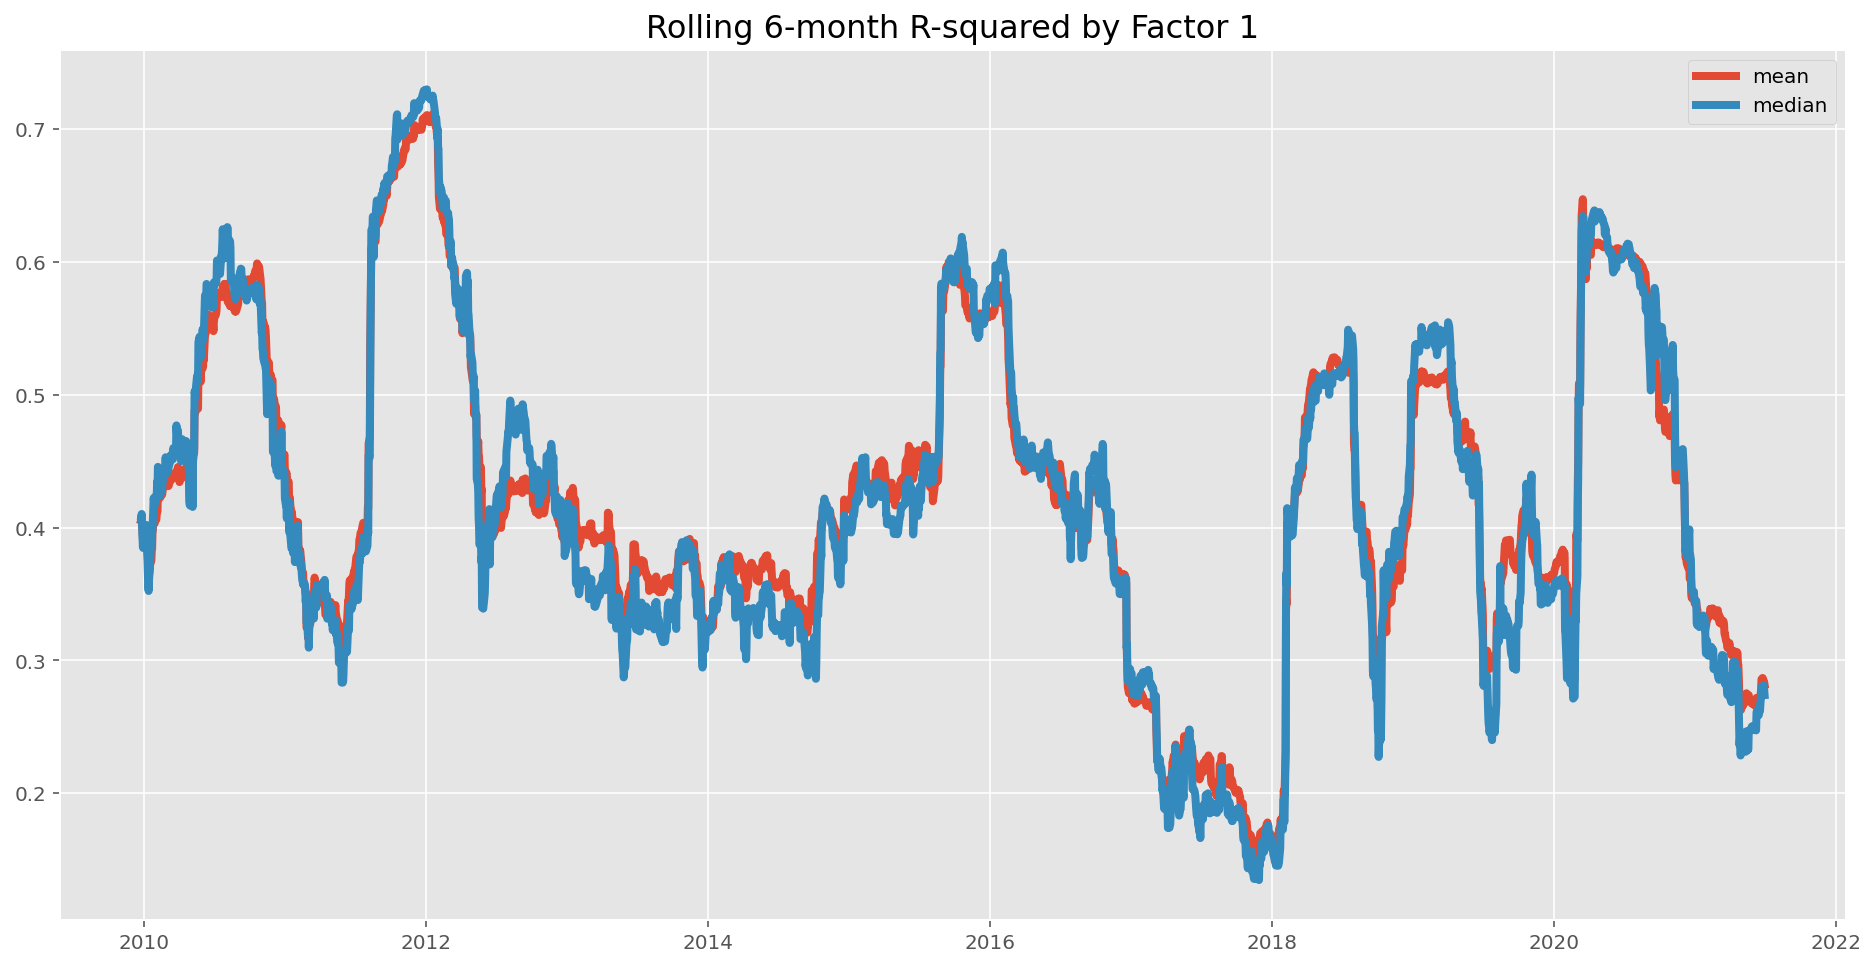

In [20]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df_rsq01[['mean_rsq', 'median_rsq']], lw='4')
plt.legend(['mean', 'median'])
plt.title("Rolling 6-month R-squared by Factor 1", fontsize=16);

### factor02

In [21]:
df_rsq02 = rolling_rsquared(126, df_y, x2, equity_dict)

In [22]:
df_rsq02['mean_rsq'] = df_rsq02.mean(axis=1)
df_rsq02['median_rsq'] = df_rsq02.iloc[:,:-1].median(axis=1)

In [23]:
df_rsq02['mean_rsq'].mean()

0.07732347626576495

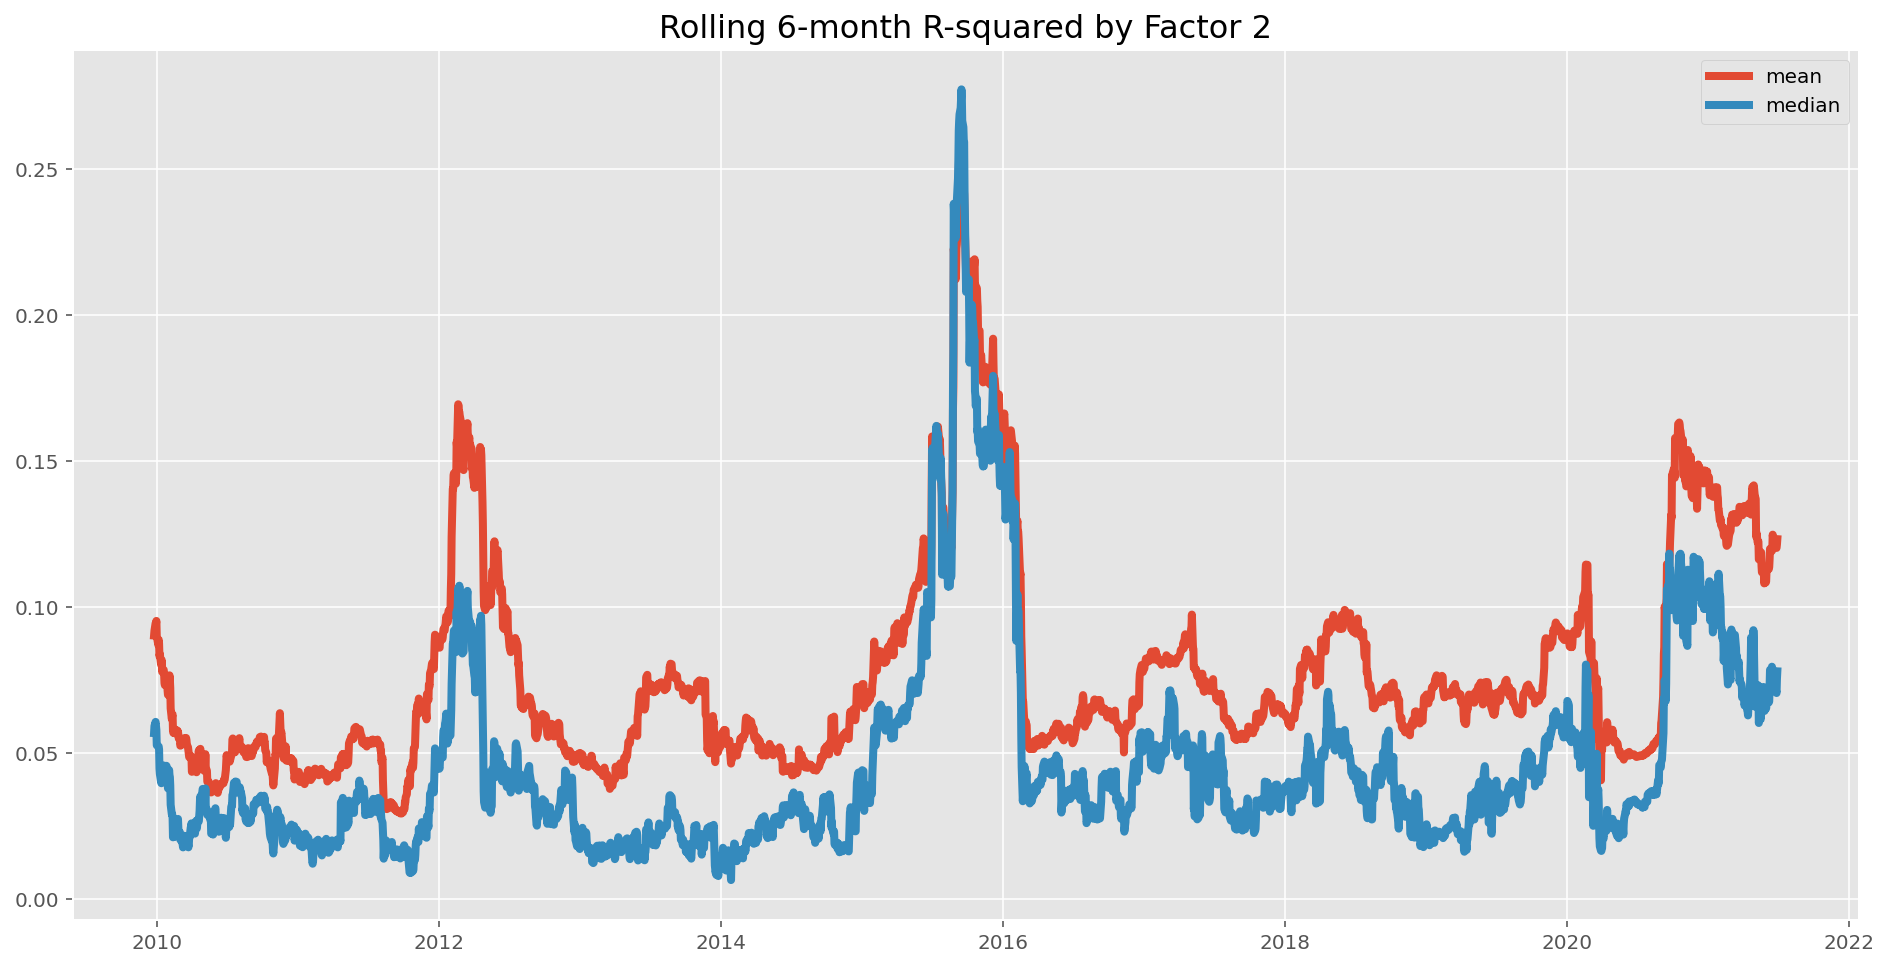

In [24]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df_rsq02[['mean_rsq', 'median_rsq']], lw='4')
plt.legend(['mean', 'median'])
plt.title("Rolling 6-month R-squared by Factor 2", fontsize=16);

### factor03

In [25]:
df_rsq03 = rolling_rsquared(126, df_y, x3, equity_dict)

In [26]:
df_rsq03['mean_rsq'] = df_rsq03.mean(axis=1)
df_rsq03['median_rsq'] = df_rsq03.iloc[:,:-1].median(axis=1)  

In [27]:
df_rsq03[['mean_rsq']].mean()

mean_rsq    0.062787
dtype: float64

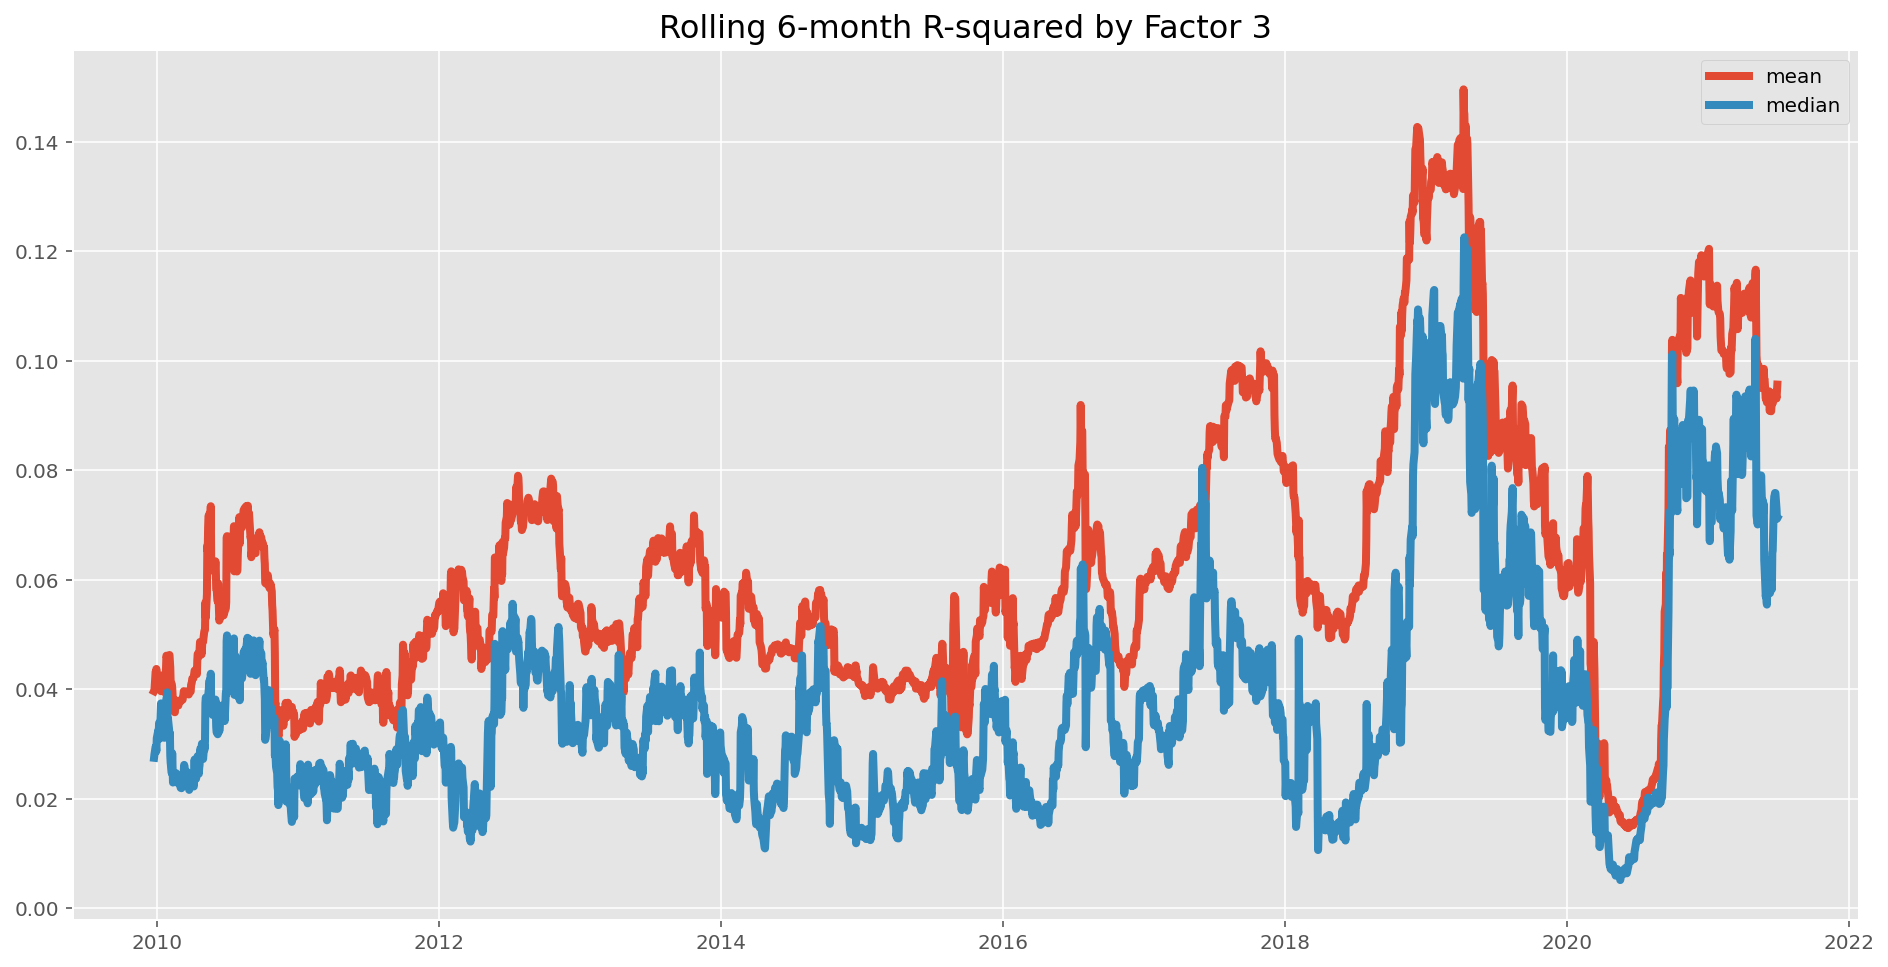

In [28]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df_rsq03[['mean_rsq', 'median_rsq']], lw='4')
plt.legend(['mean', 'median'])
plt.title("Rolling 6-month R-squared by Factor 3", fontsize=16);

### Calculating quarterly & annual R-squared

In [29]:
# Resample data to each year's mean reading
rsq_yr = df_rsq01.resample('Y').agg('mean')

In [30]:
# Start date from 2010
rsq_yr = rsq_yr.iloc[1:]

In [31]:
rsq_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2010-12-31 to 2021-12-31
Freq: A-DEC
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mmm         12 non-null     float64
 1   axp         12 non-null     float64
 2   aapl        12 non-null     float64
 3   ba          12 non-null     float64
 4   amgn        12 non-null     float64
 5   cat         12 non-null     float64
 6   cvx         12 non-null     float64
 7   csco        12 non-null     float64
 8   ko          12 non-null     float64
 9   pfe         12 non-null     float64
 10  gs          12 non-null     float64
 11  hd          12 non-null     float64
 12  hon         12 non-null     float64
 13  ibm         12 non-null     float64
 14  intc        12 non-null     float64
 15  jnj         12 non-null     float64
 16  jpm         12 non-null     float64
 17  mcd         12 non-null     float64
 18  mrk         12 non-null     float64
 19 

In [32]:
# Resample data to each business quarter's average reading
rsq_qtr = df_rsq01.resample('BQ').agg('mean')

In [33]:
rsq_qtr = rsq_qtr.iloc[1:]

In [34]:
rsq_qtr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2010-03-31 to 2021-06-30
Freq: BQ-DEC
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mmm         46 non-null     float64
 1   axp         46 non-null     float64
 2   aapl        46 non-null     float64
 3   ba          46 non-null     float64
 4   amgn        46 non-null     float64
 5   cat         46 non-null     float64
 6   cvx         46 non-null     float64
 7   csco        46 non-null     float64
 8   ko          46 non-null     float64
 9   pfe         46 non-null     float64
 10  gs          46 non-null     float64
 11  hd          46 non-null     float64
 12  hon         46 non-null     float64
 13  ibm         46 non-null     float64
 14  intc        46 non-null     float64
 15  jnj         46 non-null     float64
 16  jpm         46 non-null     float64
 17  mcd         46 non-null     float64
 18  mrk         46 non-null     float64
 19

# Macro-Financial Data

In [35]:
file = 'C:\\factors.csv'
df_spx = pd.read_csv(file)

In [36]:
df_spx.head(5)

,spx,spx_value,dj_mom,dj_tech,spx_oil,vix,oil,copper,us_ois,us_real10,us_yc,factor01,factor02,factor03,date
0,0.435243,0.404485,0.548698,0.709637,0.264037,-0.494580,-0.833338,2.493022,-6.69,3.51,7.53,1.994018,1.573134,0.232349,2009-07-01
1,-2.957765,-3.240301,-2.914849,-2.322769,-4.240975,6.389472,-3.793457,-1.085787,-7.33,4.21,1.43,-10.959370,0.118236,1.471476,2009-07-02
2,0.000000,-0.000404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.78,-0.01,0.41,-0.290846,-0.253915,0.030770,2009-07-03
3,0.256248,0.492937,-0.093941,-0.537630,-2.951456,3.687863,-4.099060,-1.739940,-3.86,4.26,4.79,2.504505,0.679455,-2.109683,2009-07-06
4,-1.987985,-1.866508,-1.706203,-2.470537,-2.730256,6.184092,-1.764103,-1.635158,-3.14,-6.36,-7.58,-7.623477,1.916702,-0.906133,2009-07-07


In [37]:
df_spx['date'] = pd.to_datetime(df_spx.date, format='%Y-%m-%d').dt.to_period('D')

In [38]:
# Setting Date Index
df_spx.set_index('date', inplace=True)
df_spx.index = df_spx.index.to_timestamp()

In [39]:
# Obtain S&P500 returns as benchmark comparison, generated as a Pandas series
df_spx = df_spx[['spx']]

# Calculating Information Ratio

In [40]:
df_spx

,spx
date,
2009-07-01,0.435243
2009-07-02,-2.957765
2009-07-03,0.000000
2009-07-06,0.256248
2009-07-07,-1.987985
...,...
2021-06-24,0.579434
2021-06-25,0.332507
2021-06-28,0.231237


In [41]:
df_daily = df_y

In [42]:
# Subtract spx returns from each row of stocks' returns (log-differenced) for the excess returns
df_daily = df_daily.sub(df_spx.spx, axis=0)

In [43]:
df_daily['mean'] = df_daily.mean(axis=1)

### Computing for quarterly periods

In [44]:
# Need to exclude the last 'mean' column from the resampling
df_diff = df_daily.iloc[:,:-1].resample('BQ').agg('mean')

In [45]:
df_track = df_daily.iloc[:,:-1].resample('BQ').agg(np.std)

In [46]:
# Dividing the excess returns by their standard deviation (i.e. tracking error)
df_ir = df_diff/df_track

In [47]:
# Set the first date to Q1 2010, and scaling to quarterly period
df_ir = df_ir.iloc[2:]*(63**0.5)

In [48]:
df_ir['mean_ir'] = df_ir.mean(axis=1)
df_ir['std_ir'] = df_ir.iloc[:,:-1].std(axis=1)

In [49]:
df_ir.head(10)

,mmm,axp,aapl,ba,amgn,cat,cvx,csco,ko,pfe,...,unh,vz,visa,wba,wmt,dis,rtx,xom,mean_ir,std_ir
date,,,,,,,,,,,,,,,,,,,,,
2010-03-31,-0.520527,-0.282162,0.662417,2.145870,0.109914,0.390366,-1.229471,0.476585,-1.105385,-1.331418,...,0.161896,-1.402783,-0.098327,-0.411265,-0.105762,0.415095,0.183861,-1.526363,-0.110928,0.856695
2010-06-30,1.064715,0.739294,1.616531,-0.200842,-0.021740,0.739766,0.249382,-0.966624,0.352069,-0.664561,...,-0.119591,0.272332,-0.737848,-1.775512,-0.171705,0.296960,0.007776,-0.527949,0.125129,0.831254
2010-09-30,-0.194368,-0.453566,0.205757,-0.487682,-0.624920,2.055358,1.651238,-0.544186,0.793527,0.846617,...,1.238281,1.322202,-0.377369,0.910365,0.076797,-1.037734,-0.182751,-0.425893,0.040784,0.864019
2010-12-31,-1.209413,-0.620980,0.435026,-1.279259,-1.115951,1.159432,0.379114,-0.927497,0.356439,-1.132292,...,-0.664294,-0.062230,-0.847469,0.579184,-1.381972,0.315989,0.060112,1.740892,-0.261082,0.925867
2011-03-31,0.445631,-0.012117,0.286093,0.930098,-0.986851,1.454004,1.590125,-1.307390,-0.656426,1.233137,...,1.715858,0.225454,-0.087513,-0.231801,-1.175998,1.032478,0.455283,1.092033,-0.098727,1.082840
2011-06-30,0.417751,2.084851,-0.377320,0.060341,1.013413,-0.426069,-0.641619,-0.862407,0.310090,0.221717,...,1.214706,-0.493937,0.874413,0.631254,0.435166,-1.363495,0.800207,-0.542247,0.295912,0.961033
2011-09-30,-1.535795,0.149269,2.633644,-0.451032,0.952677,-1.783350,0.780135,1.051701,1.907968,0.021635,...,0.454076,1.440003,1.693948,-0.651115,1.178898,-1.064917,-0.803421,0.636526,0.423462,1.214414
2011-12-30,0.309437,-0.689595,-0.384427,0.964430,0.424874,0.940394,0.409157,0.524874,-0.793073,1.234330,...,-0.099467,-0.227139,0.708512,-0.674112,0.338764,1.242933,-1.150532,0.838892,0.108229,0.795188
2012-03-30,-0.649572,1.169095,2.617156,-2.073948,-0.744565,0.514343,-1.522281,0.675951,-0.945291,-1.264021,...,0.356985,-2.688406,0.368041,-0.966701,-1.297113,0.661567,0.183114,-1.706131,-0.232263,1.397668


C:\Users\camb7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


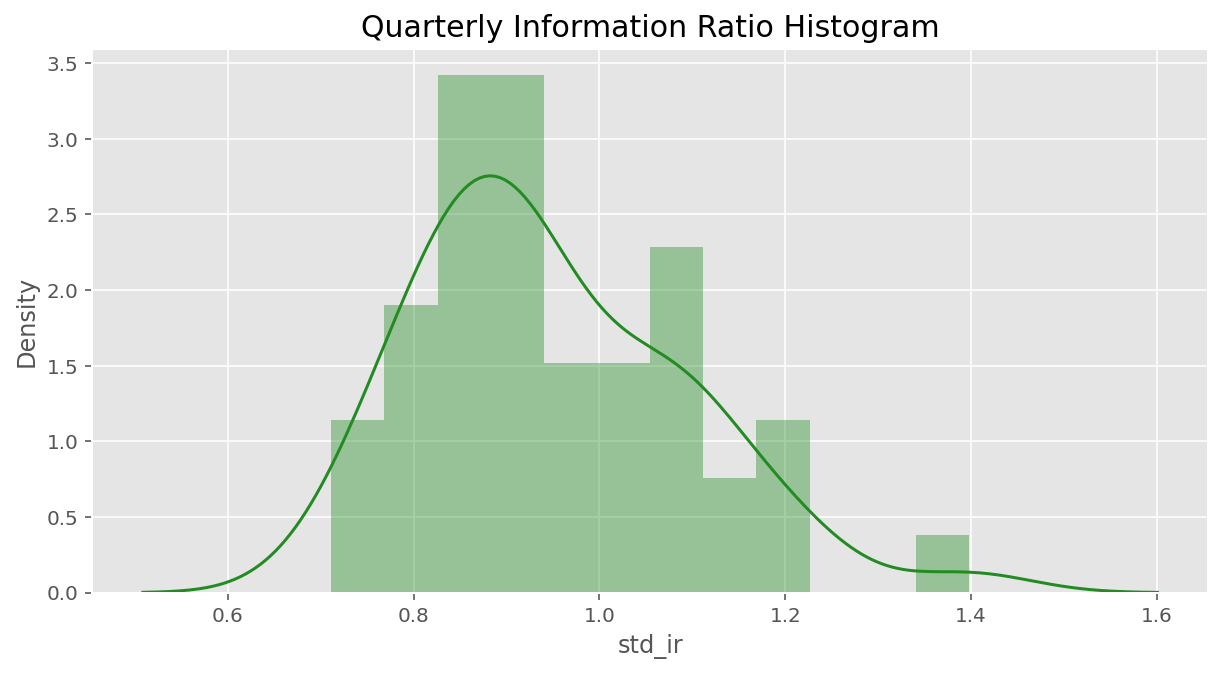

In [50]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(df_ir.std_ir, bins=12, kde=True, ax=ax, color='forestgreen')
plt.title('Quarterly Information Ratio Histogram', fontsize=15);

In [51]:
rsq_ir = pd.concat([rsq_qtr['mean_rsq'].reset_index(drop=True), df_ir['std_ir'].reset_index(drop=True)], axis=1)

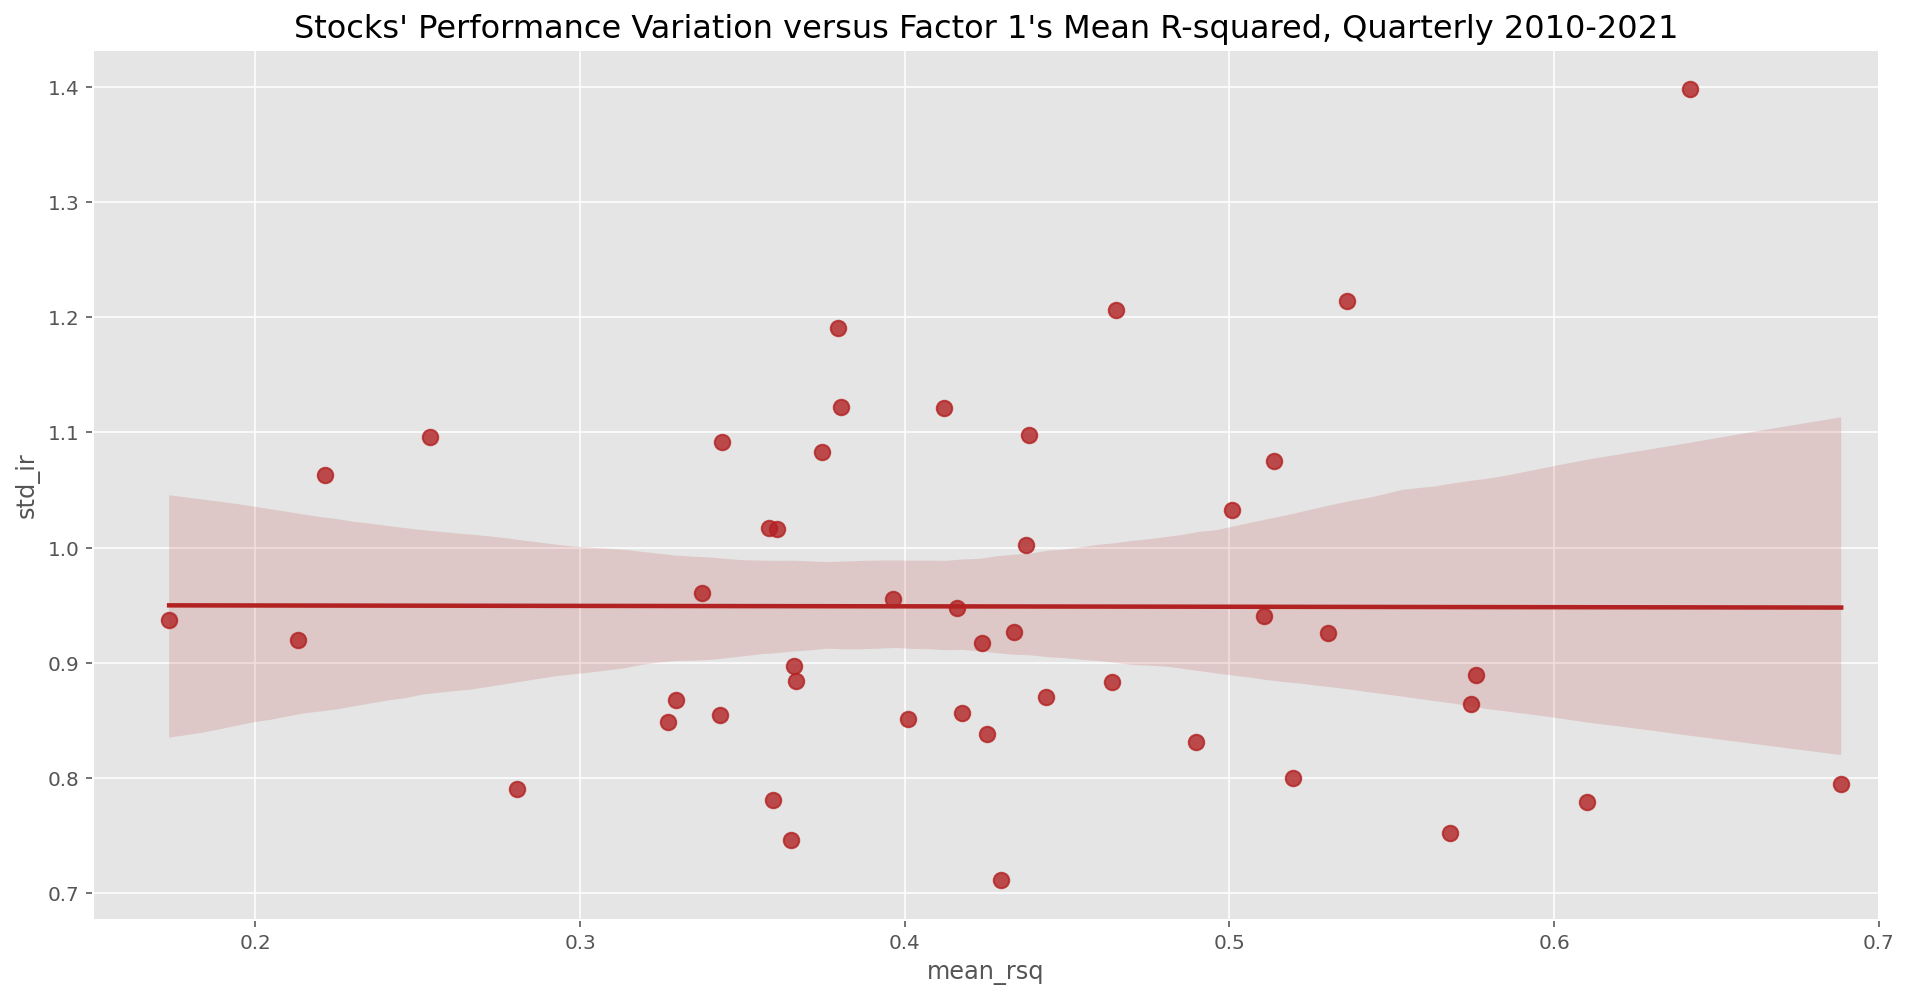

In [52]:
fig, ax = plt.subplots(figsize=(16,8))

sns.regplot(x="mean_rsq", y="std_ir", data=rsq_ir, color='firebrick', scatter_kws={'s':60}, ax=ax) 
ax.set_title("Stocks' Performance Variation versus Factor 1's Mean R-squared, Quarterly 2010-2021", fontsize=16)
ax.set_xlim([0.15, 0.7]);

In [53]:
rsq_ir.std_ir[(rsq_ir.std_ir > np.mean(rsq_ir.std_ir) + 3*np.std(rsq_ir.std_ir))].count()

1

In [54]:
# Delete outlier data point
rsq_ir = rsq_ir[(rsq_ir.std_ir <= np.mean(rsq_ir.std_ir) + 3*np.std(rsq_ir.std_ir))]

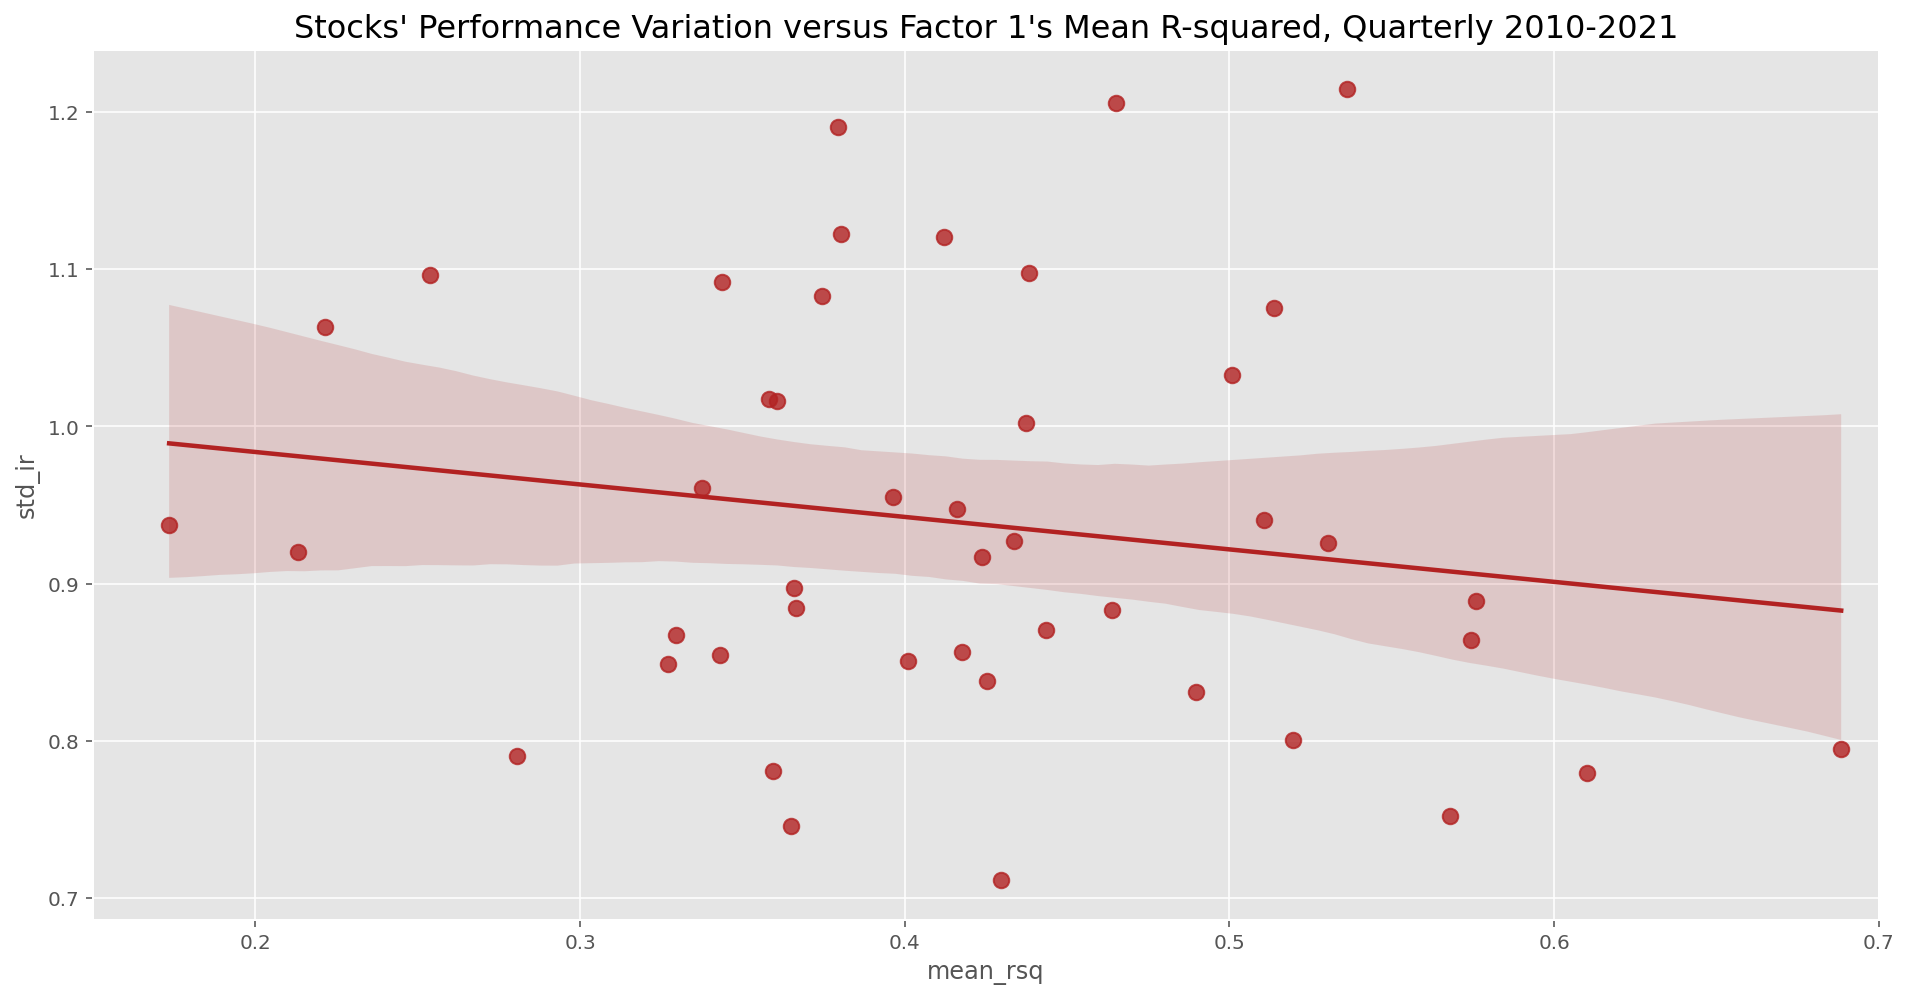

In [55]:
fig, ax = plt.subplots(figsize=(16,8))

sns.regplot(x="mean_rsq", y="std_ir", data=rsq_ir, color='firebrick', scatter_kws={'s':60}, ax=ax) 
ax.set_title("Stocks' Performance Variation versus Factor 1's Mean R-squared, Quarterly 2010-2021", fontsize=16)
ax.set_xlim([0.15, 0.7]);

### Computing for annual periods

In [56]:
# Need to exclude the last 'mean' column from the resampling
df_diff_y = df_daily.iloc[:,:-1].resample('Y').agg('mean')

In [57]:
df_track_y = df_daily.iloc[:,:-1].resample('Y').agg(np.std)

In [58]:
# Dividing the excess returns by their standard deviation (i.e. tracking error)
df_ir_y = df_diff_y/df_track_y

In [59]:
df_ir_y = df_ir_y.iloc[1:]

In [60]:
df_ir_y

,mmm,axp,aapl,ba,amgn,cat,cvx,csco,ko,pfe,...,crm,trv,unh,vz,visa,wba,wmt,dis,rtx,xom
date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,-0.035916,-0.017777,0.100880,0.021048,-0.049427,0.119006,0.028979,-0.071065,0.009657,-0.059015,...,0.078896,-0.004044,0.013837,0.009515,-0.072811,-0.017368,-0.042112,0.013001,0.003167,-0.031159
2011-12-31,-0.025415,0.036323,0.070436,0.043746,0.050528,-0.010241,0.069370,-0.027249,0.025718,0.083721,...,-0.045931,0.022983,0.101204,0.041629,0.102052,-0.040753,0.036180,-0.000089,-0.035223,0.071826
2012-12-31,0.001304,0.031787,0.036973,-0.045603,0.073970,-0.044307,-0.058265,-0.011917,-0.051281,0.011083,...,0.076613,0.031049,-0.018638,-0.022155,0.099929,-0.003694,0.002445,0.071779,-0.005162,-0.070727
2013-12-31,0.100124,0.093573,-0.045179,0.113570,0.005440,-0.104305,-0.073372,-0.033921,-0.063122,-0.027361,...,0.002992,-0.016316,0.022645,-0.051767,0.043902,0.056333,-0.059070,0.081655,0.041008,-0.064965
2014-12-31,0.032969,-0.046722,0.067128,-0.062599,0.071223,-0.039430,-0.092543,0.049076,-0.034495,-0.042717,...,-0.007586,0.028070,0.077414,-0.069437,0.021280,0.040883,-0.009872,0.053587,-0.054760,-0.098849
2015-12-31,-0.038783,-0.100793,-0.012385,0.046532,0.008181,-0.090337,-0.065438,-0.006448,0.013109,0.018955,...,0.068922,0.039524,0.050133,-0.002486,0.073258,0.033196,-0.112799,0.040469,-0.078343,-0.065227
2016-12-31,0.045305,-0.007659,0.001455,-0.005736,-0.062471,0.065855,0.060099,0.005931,-0.057373,-0.031124,...,-0.048808,-0.004467,0.086285,0.021258,-0.035322,-0.042427,0.009283,-0.047999,0.019682,0.021792
2017-12-31,0.050834,0.067866,0.082450,0.176738,-0.001594,0.121785,-0.050963,0.026761,-0.044309,-0.039534,...,0.100285,-0.035455,0.068218,-0.067878,0.116172,-0.109033,0.062144,-0.059854,-0.013485,-0.144496
2018-12-31,-0.061844,0.009098,-0.001866,0.042032,0.066941,-0.041501,-0.025963,0.075953,0.037550,0.105360,...,0.092103,-0.023794,0.073802,0.036843,0.093675,0.000949,0.001730,0.034687,-0.046177,-0.052673


In [61]:
# Scale the 2010-2020 IR estimates to annual
df_ir_y.iloc[:-1] = df_ir_y.iloc[:-1]*(252**0.5)

In [62]:
# Scale the 2021 IR to reflect that it is a semi-annual estimate
df_ir_y.iloc[-1] = df_ir_y.iloc[-1]*(126**0.5)

In [63]:
df_ir_y['mean_ir'] = df_ir_y.mean(axis=1)
df_ir_y['std_ir'] = df_ir_y.iloc[:,:-1].std(axis=1)

In [64]:
rsq_ir_y = pd.concat([rsq_yr['mean_rsq'].reset_index(drop=True), df_ir_y['std_ir'].reset_index(drop=True)], axis=1)

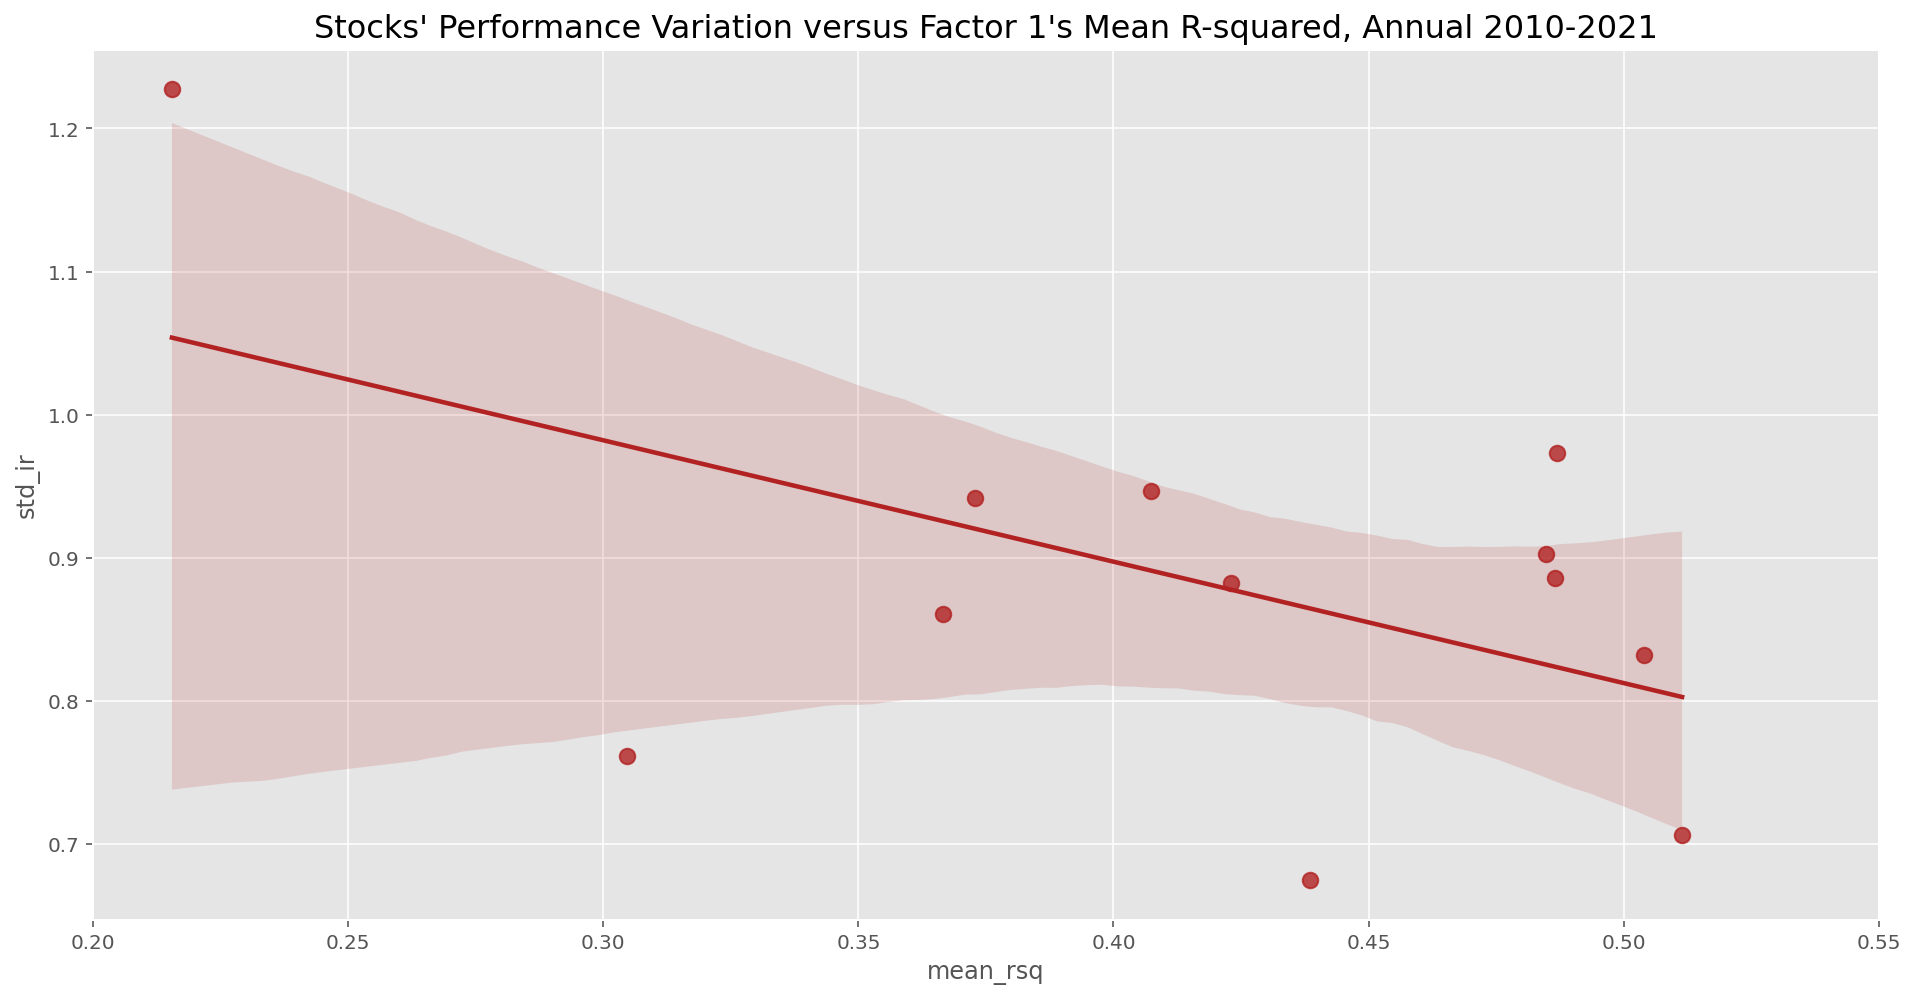

In [65]:
fig, ax = plt.subplots(figsize=(16,8))

sns.regplot(x="mean_rsq", y="std_ir", data=rsq_ir_y, color='firebrick', scatter_kws={'s':60}, ax=ax) 
ax.set_title("Stocks' Performance Variation versus Factor 1's Mean R-squared, Annual 2010-2021", fontsize=16)
ax.set_xlim([0.2, 0.55]);

# Distribution of Returns in Different Horizons

In [66]:
df_daily = df_daily.iloc[132:]

In [67]:
df_diff['mean'] = df_diff.mean(axis=1)

In [68]:
df_diff = df_diff.iloc[2:]

In [69]:
df_diff_y['mean'] = df_diff_y.mean(axis=1)

In [70]:
df_diff_y = df_diff_y.iloc[1:]

In [71]:
scaler = StandardScaler()

In [72]:
# Standardise the excess returns data, and the output are Numpy arrays
dy_scaled = scaler.fit_transform(df_daily[['mean']]) 
qt_scaled = scaler.fit_transform(df_diff[['mean']])
yr_scaled = scaler.fit_transform(df_diff_y[['mean']])

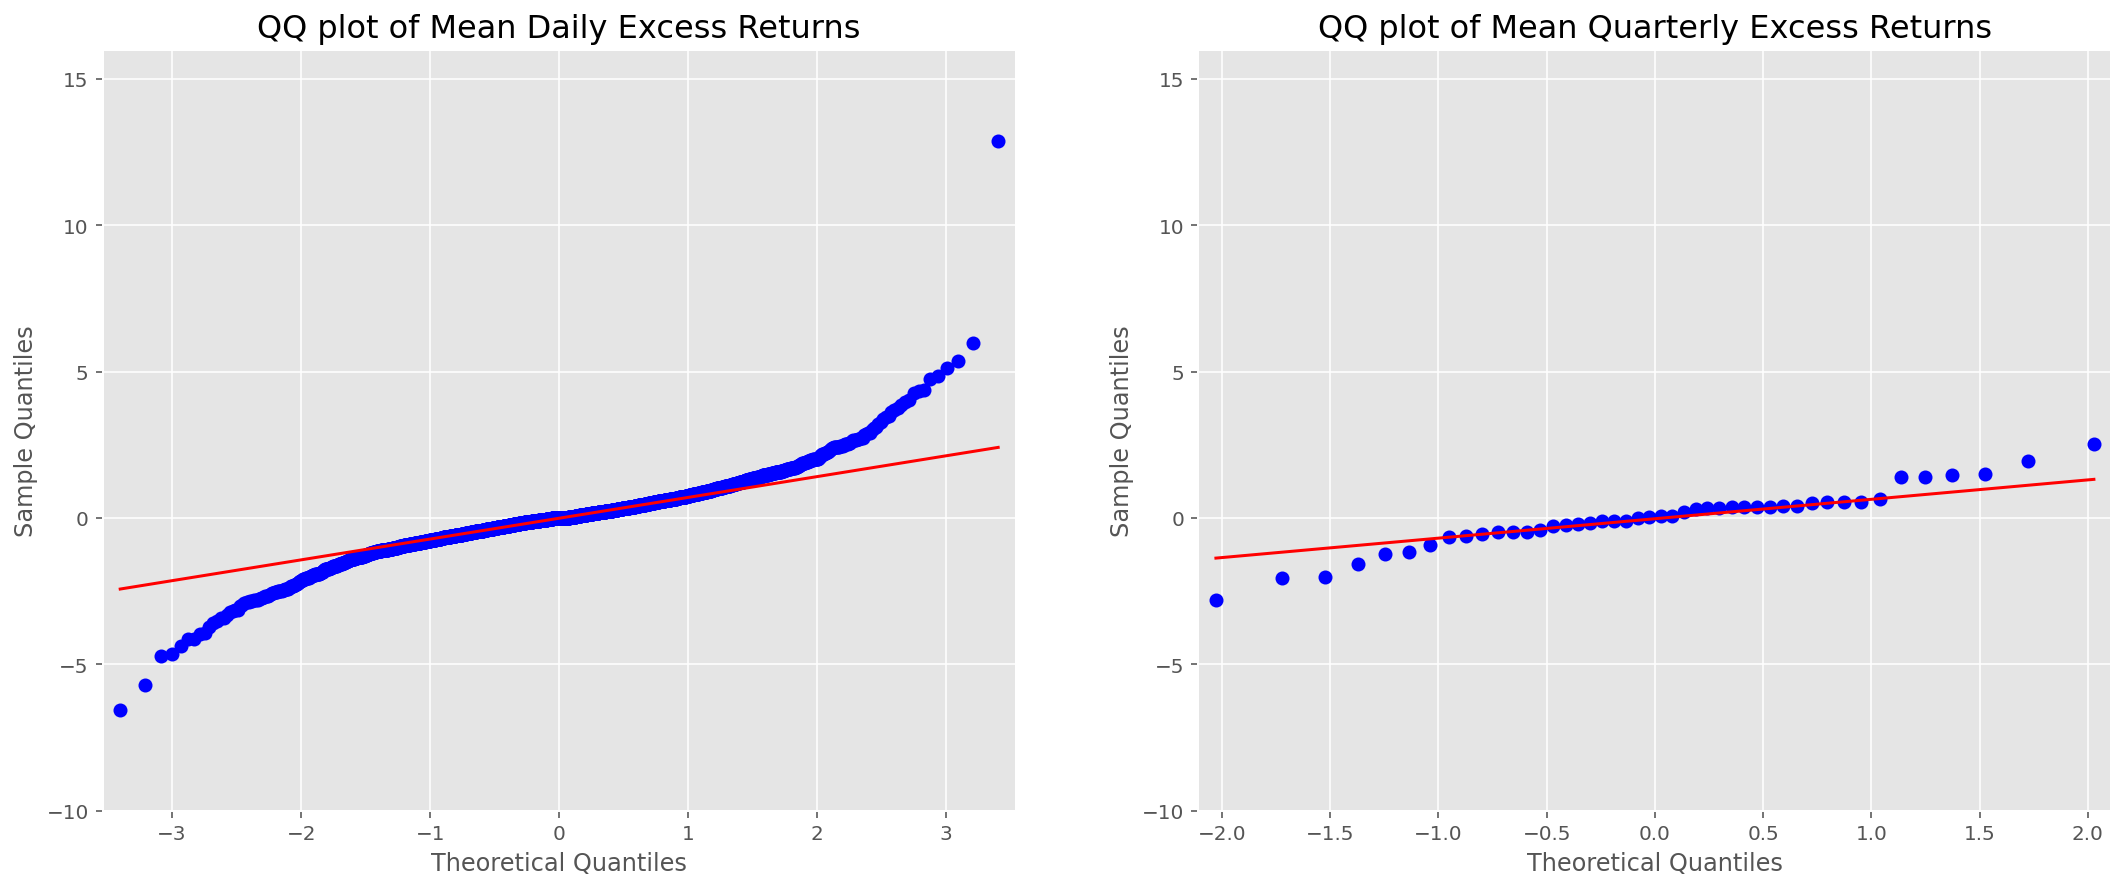

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(18, 7))

sm.qqplot(dy_scaled.ravel(), line='q', ax=ax1)
ax1.set_title('QQ plot of Mean Daily Excess Returns', fontsize=16)
ax1.set_ylim([-10, 16])

sm.qqplot(qt_scaled.ravel(), line='q', ax=ax2)
ax2.set_title('QQ plot of Mean Quarterly Excess Returns', fontsize=16)
ax2.set_ylim([-10, 16])
plt.show()

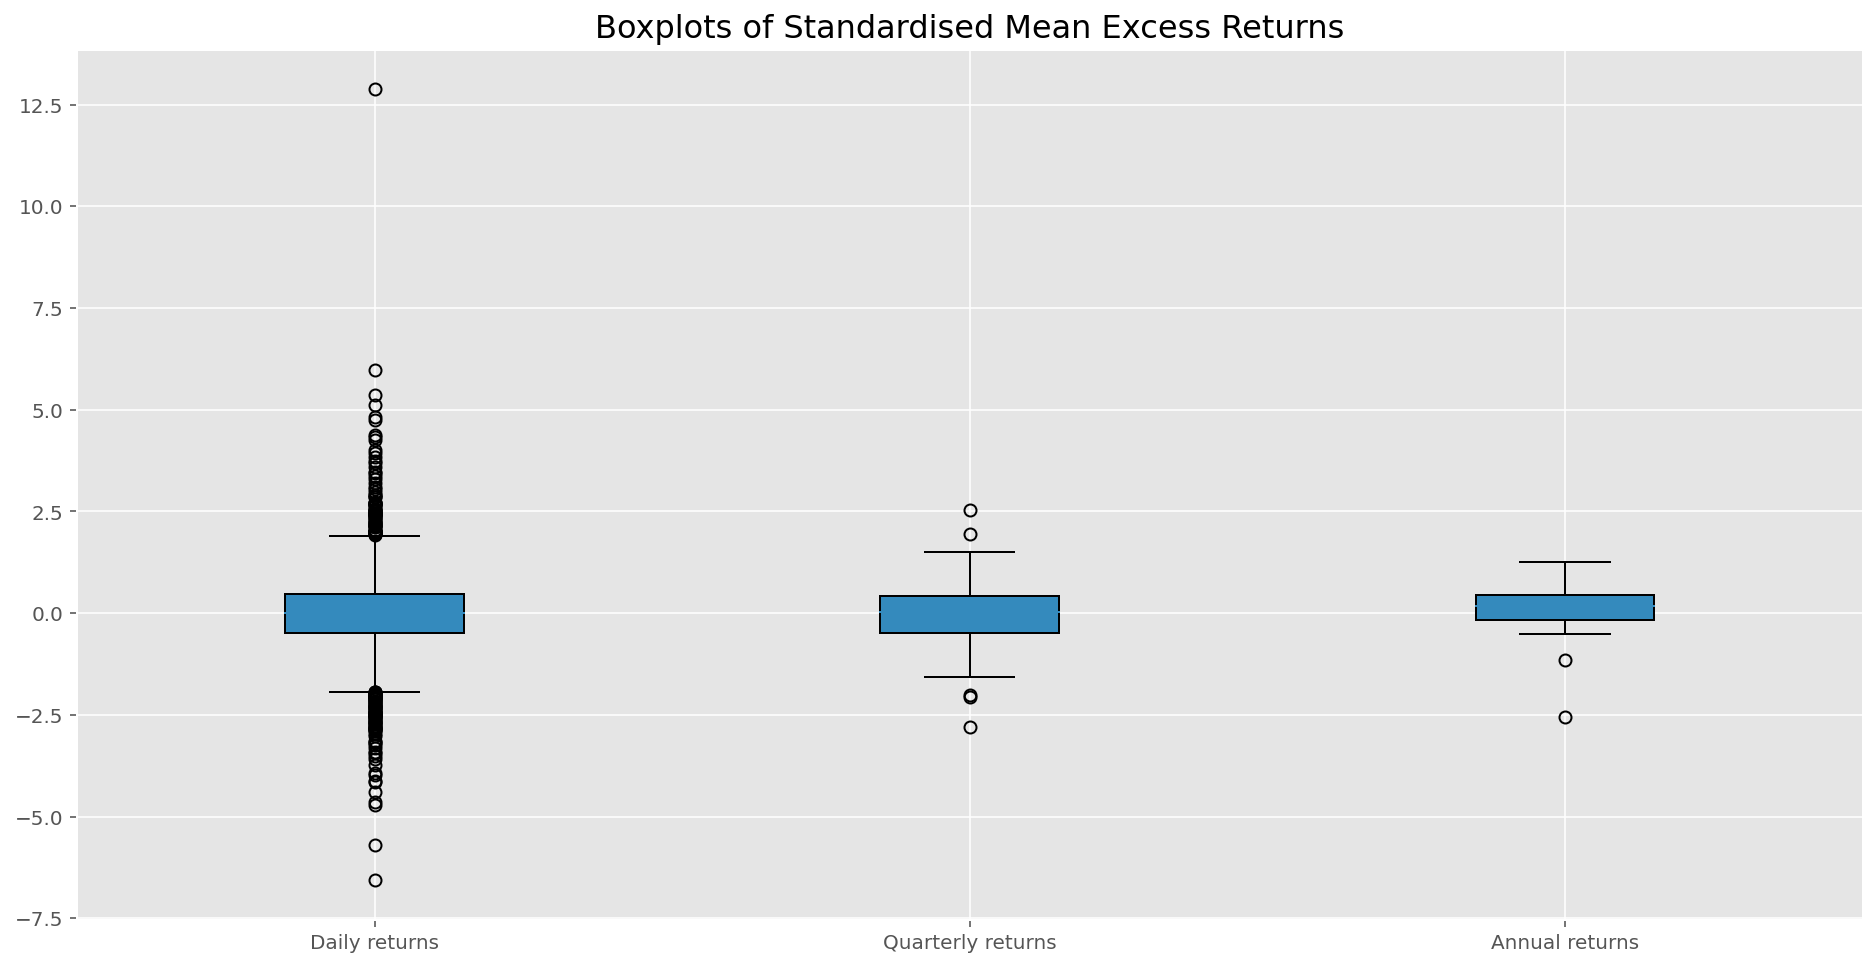

In [74]:
fig, ax = plt.subplots(figsize=(16, 8))

box_data=[dy_scaled.ravel(), qt_scaled.ravel(), yr_scaled.ravel()] # Need to flatten the Numpy arrays
ax.boxplot(box_data, patch_artist=True, labels=['Daily returns','Quarterly returns', 'Annual returns'])
ax.set_title("Boxplots of Standardised Mean Excess Returns", fontsize=16)
plt.show()